<a href="https://colab.research.google.com/github/Pmskabir1234/Machine_Learning/blob/main/conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow
from tensorflow import keras
from tensorflow.keras import models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

from tensorflow.keras.utils import to_categorical


In [20]:
df = pd.read_csv('mnist_test.csv')
df = df.rename(columns={'7':'Target'})
X = df.drop(['Target'],axis=1).values
y = df['Target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state = 42)

#now we'll change the pixel values between 0-1
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

#now we'll reshape the flatten pixel valeus to matrix to form the image
X_train_img = X_train.reshape(-1,28,28) # -1 means that whole bunches will be in one column
X_test_img = X_test.reshape(-1,28,28)

# X_train_img -> take a look how it basically appearing now

#we'll one-hot-encode the Target values now since they range from 0-9
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

Perceptron Version

In [24]:
percep = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10,activation='softmax')
])
percep.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history_percep = percep.fit(
    X_train_img,y_train_cat,epochs=5,
    batch_size = 32,validation_split=0.25,
    verbose = 1)
acc_percep = percep.evaluate(X_test_img,y_test_cat,verbose=1)[1]
acc_percep

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3196 - loss: 2.0271 - val_accuracy: 0.7381 - val_loss: 1.2810
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7726 - loss: 1.1597 - val_accuracy: 0.8171 - val_loss: 0.9219
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8162 - loss: 0.8895 - val_accuracy: 0.8395 - val_loss: 0.7666
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8483 - loss: 0.7258 - val_accuracy: 0.8496 - val_loss: 0.6742
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.6612 - val_accuracy: 0.8587 - val_loss: 0.6156
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.6194


0.8583999872207642

ANN Version

In [33]:
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_ann = ann.fit(
    X_train_img,y_train_cat,
    validation_split=0.25,
    batch_size=32,
    epochs=5,
    verbose=1
)
acc_ann = ann.evaluate(X_test_img,y_test_cat,verbose=1)[1]
acc_ann

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6734 - loss: 1.1034 - val_accuracy: 0.9099 - val_loss: 0.2990
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9315 - loss: 0.2577 - val_accuracy: 0.9296 - val_loss: 0.2270
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9514 - loss: 0.1587 - val_accuracy: 0.9333 - val_loss: 0.2263
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9650 - loss: 0.1187 - val_accuracy: 0.9339 - val_loss: 0.2151
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0853 - val_accuracy: 0.9381 - val_loss: 0.2029
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.2014


0.9416000247001648

CNN Version

In [38]:
#to train our CNN model, first we have to rehape the data
#since this dataset contains a greyscale image so there is only one channel
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

cnn = Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(), #in order prepare it to connect with ann
    Dense(128,activation='relu'), #from here ann takes the lead
    Dropout(0.5), #to avoid overfitting
    Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_cnn = cnn.fit(
    X_train_cnn,y_train_cat,
    validation_split=0.25,
    batch_size=32,
    epochs = 50,
    verbose = 1
)

acc_cnn = cnn.evaluate(X_test_cnn,y_test_cat,verbose=1)[1]

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5914 - loss: 1.2357 - val_accuracy: 0.9488 - val_loss: 0.1518
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9348 - loss: 0.2271 - val_accuracy: 0.9648 - val_loss: 0.1006
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9538 - loss: 0.1473 - val_accuracy: 0.9755 - val_loss: 0.0767
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9636 - loss: 0.1129 - val_accuracy: 0.9749 - val_loss: 0.0745
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9717 - loss: 0.0808 - val_accuracy: 0.9792 - val_loss: 0.0624
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9750 - loss: 0.0756 - val_accuracy: 0.9803 - val_loss: 0.0603
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9806 - loss: 0.0654 - val_accuracy: 0.9792 - val_loss: 0.0641
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9821 - loss: 0.0568 - val_acc

In [39]:
acc_cnn

0.9860000014305115

Visualising the process

In [44]:
def show(history,Title):
  plt.plot(history.history['accuracy'],label='Accuracy')
  plt.plot(history.history['loss'],label='Loss')
  plt.legend()
  plt.title(f'{Title} Training')
  plt.show()

  plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
  plt.plot(history.history['val_loss'],label='Val_Loss')
  plt.legend()
  plt.title(f'{Title} Testing')
  plt.show()

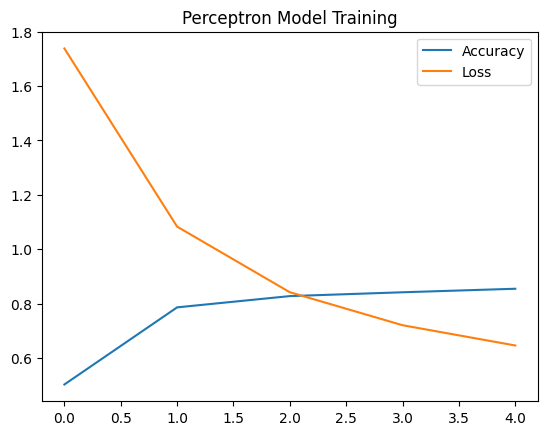

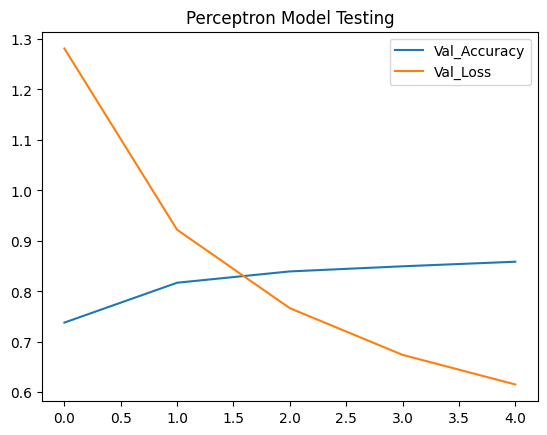

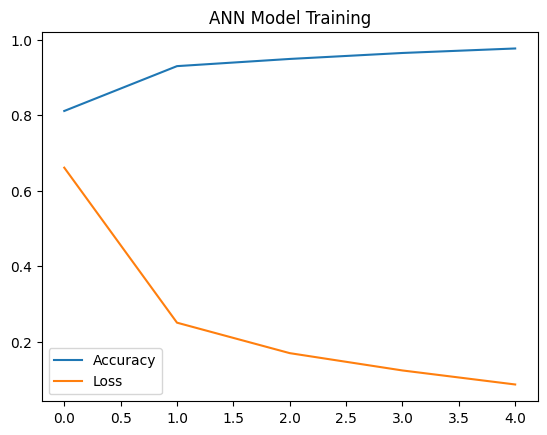

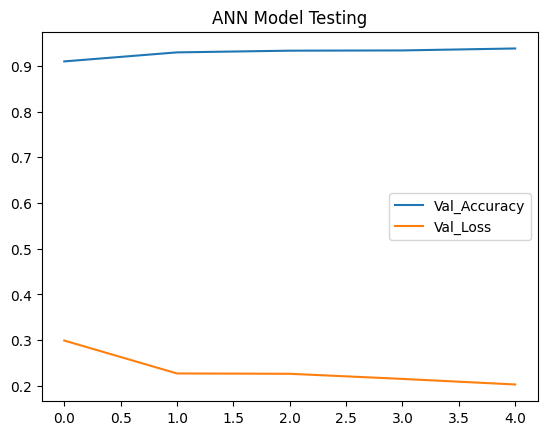

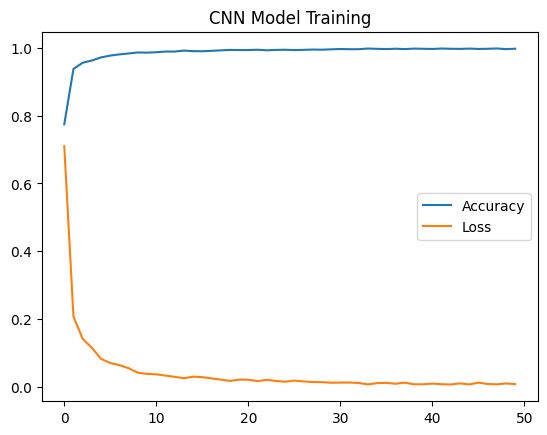

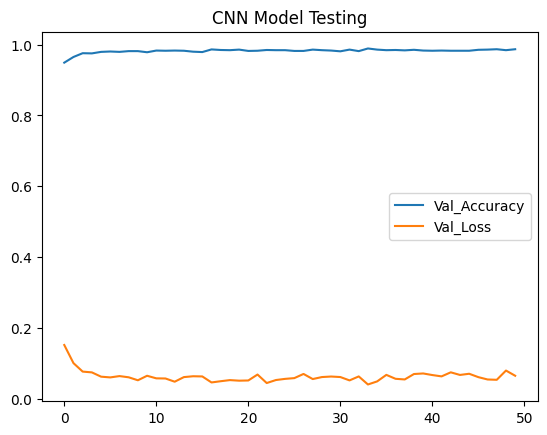

In [45]:
show(history_percep,'Perceptron Model')
show(history_ann,'ANN Model')
show(history_cnn,'CNN Model')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


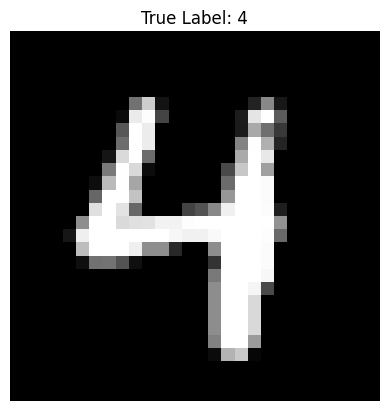

Perceptron Prediction: 4
ANN Prediction: 4
CNN Prediction: 4


In [60]:
import random

# Select a random index from the test set
random_index = random.randint(0, len(X_test_img) - 1)

# Get the random image and its true label
random_image = X_test_img[random_index]
true_label = y_test[random_index]

# Reshape the image for CNN prediction
random_image_cnn = random_image.reshape(1, 28, 28, 1)

# Get predictions from each model
percep_prediction = np.argmax(percep.predict(random_image.reshape(1, 28, 28)), axis=-1)[0]
ann_prediction = np.argmax(ann.predict(random_image.reshape(1, 28, 28)), axis=-1)[0]
cnn_prediction = np.argmax(cnn.predict(random_image_cnn), axis=-1)[0]

# Display the image
plt.imshow(random_image, cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

# Display the predictions
print(f"Perceptron Prediction: {percep_prediction}")
print(f"ANN Prediction: {ann_prediction}")
print(f"CNN Prediction: {cnn_prediction}")